# GD with stochastic approach - Exercise $3$

This exercise is intended to create a perceptron with a gradient descent approach to solve a binary classification problem with synthetic data generation

## Dataset

Each class will have exactly $1500$ data points and the seed should be set to $290$.

Let's define the first class $X_1$:
- $X_1^1$ is a normal distribution with a mean of 0 and a standard deviation of 10
- $X_1^2$ is a normal distribution with a mean of 0 and a standard deviation of 10

The second class $X_2$ is defined as follows:
- $X_2^1$ is a normal distribution with a mean of 30 and a standard deviation of 10
- $X_2^2$ is a normal distribution with a mean of 30 and a standard deviation of 10

The class $X_1$ will have the label "+1" meanwhile $X_2$ will have the label "-1"

In [1]:
import numpy as np

# set seed
np.random.seed(290)

# number of data
N = 1500

# class 1
X1_1 = np.random.normal(loc=0, scale=10, size=N)
X1_2 = np.random.normal(loc=0, scale=10, size=N)

# class 2
X2_1 = np.random.normal(loc=30, scale=10, size=N)
X2_2 = np.random.normal(loc=30, scale=10, size=N)

# labels
Y1 = np.ones(N)
Y2 = - np.ones(N)



Plot the generated dataset using the <tt>scatter</tt> function

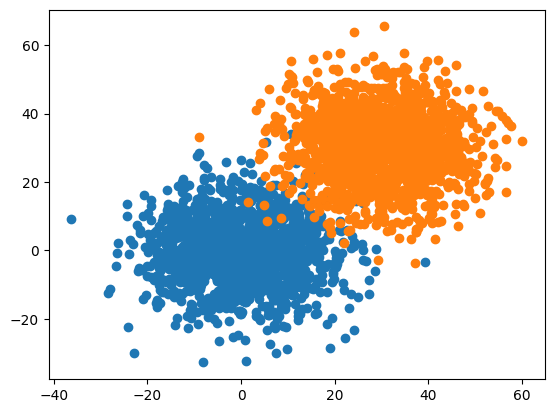

In [2]:
import matplotlib.pyplot as plt

# class 1
plt.scatter(X1_1, X1_2)

# class 2
plt.scatter(X2_1, X2_2)

Create the dataset $X$ by concatenating $X_1$ and $X_2$ and the bias $X_0$. Do the same to create the labels $Y$

In [3]:
# bias feature
X_0 = np.ones(2 * N)

# X_1 feature
X_1 = np.concatenate((X1_1, X2_1))

# X_2 feature
X_2 = np.concatenate((X1_2, X2_2))

# dataset X
X = np.stack((X_0, X_1, X_2), axis=1)

# label vector
y = np.concatenate((Y1, Y2))


### Error function

Define the error function as the _Sum Squared Error_ which is: $\frac{1}{2}\sum_{i = 1}^N(\text{e}_i)^2$, where $e$ is the error vector

In [4]:
def sse(X:np.matrix, y:np.array, w:np.array) -> float:
    return np.sum( np.square( y - np.dot(X, w) ) ) / 2

## Learning

Set up the vector of weight $w$ as a uniform distribution from -1 to 1 then train the Perceptron model using the stochastic gradient descent approach, implementing the following requirements
- set parameter $\eta$ to $10^{-4}$
- set the maximum number of epochs to $150$
- batch size of $15$

In addition, note that we want to keep track of the errors per epoch. Store in a vector named <tt>errors_epoch</tt> the number of misclassified objects for each epoch and in another vector <tt>sse_epoch</tt>, the sum of squared errors per each epoch


In [5]:
# weight vector
w = np.random.uniform(low=-1, high=1, size=X.shape[1])

# learning rate
eta = 1e-4

# epochs 
max_epochs = 150
current_epoch = 0

# stochastic approach
batch_size = 15

# errors
sse_epoch = np.zeros(max_epochs)
errors_epoch = np.zeros(max_epochs)

# training
while current_epoch < max_epochs:

    # save sum of squared errors
    sse_epoch[current_epoch] = sse(X, y, w)

    # save misclassified objects
    errors_epoch[current_epoch] = np.sum(y * np.sign(np.dot(X, w)) < 0)

    # shuffle the datase
    random_perm = np.random.permutation(range(y.size))
    X = X[random_perm, :]
    y = y[random_perm]

    # stochastic approach
    for i in range(0, y.size, batch_size):
        X_batch = X[i : (i + batch_size), :]
        y_batch = y[i : (i + batch_size)]

        # update rule
        w += 2 * eta * np.dot(np.transpose(X_batch), y_batch - np.dot(X_batch, w)) / batch_size

    current_epoch += 1

Display raw the plots containing the solution found.

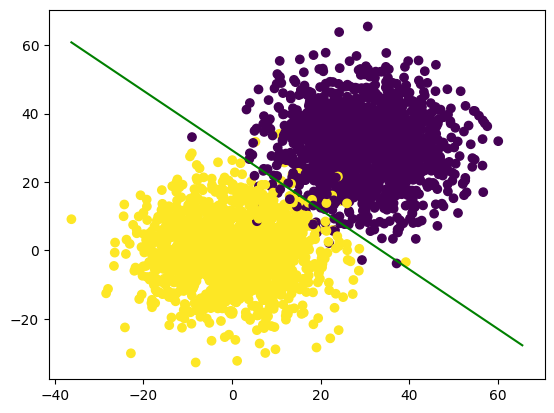

In [6]:
# display the datapoints
plt.scatter(X[:, 1], X[:, 2], c=y)

# plot the line
plt.plot([ np.min(X[:, 1]), np.max(X[:, 2]) ],
         [ - np.min(X[:, 1]) * w[1]/w[2] - w[0]/w[2], - np.max(X[:, 1]) * w[1]/w[2] - w[0]/w[2]],
         color='green')

Display the two error plots using the two error vectors

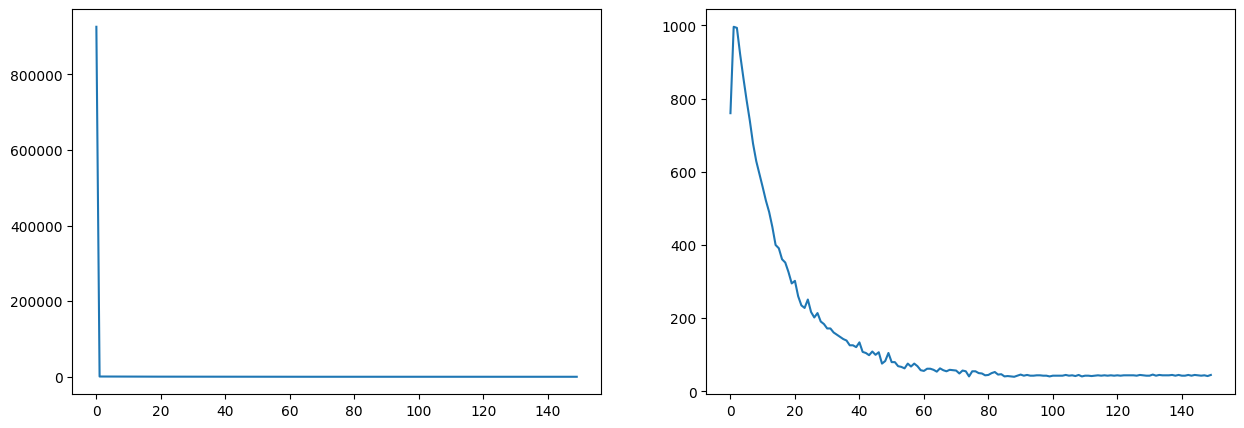

In [7]:
# subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# sum of squared errors
axs[0].plot(range(sse_epoch.size), sse_epoch)

# erros per epoch
axs[1].plot(range(errors_epoch.size), errors_epoch)